In [57]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nettools.multiplex import InterMeasures
from nettools.monoplex import CentralityMeasure
from nettools.epidemic import SISMultiplex, SIRMultiplex
from nettools.utils import load_multinet_by_name, NX_CENTRALITY

# Centrality

After analysing interdependence for multilayer networks, I decided to measure centrality for nodes in purpose of finding the *best spreader* in network. In my reasearch I will test few commonly used metrics. <br><br>
**Metrics**
* Degree
* Closeness
* Betweenness
* Eigenvector
* Pagerank
* Hits
* K-shell
* Voterank

After finding most central node in network, This node become infected, and start *disease / information spreading* on network.

# Load Datasets

In reaserch same as before I use *London Transportation*, *European Airplanes* and *FAO Trade Network*.

In [3]:
network_london = load_multinet_by_name('london')

In [4]:
network_fao = load_multinet_by_name('fao')

In [5]:
network_euair = load_multinet_by_name('EUAir')

# Construct network attributes dictionary
**InterMeasures** object accept dictionary with network parameters, but
it's possible to pass database name instead.

### *European Airlines* Network properties

In [6]:
network_attrs_eu = {}
network_attrs_eu['loaded_network'] = network_euair[0]
network_attrs_eu['network_graph_np'] = network_euair[1]
network_attrs_eu['network_weights_np'] = network_euair[2]
network_attrs_eu['mapping'] = network_euair[3]
network_attrs_eu['layers_attr'] = network_euair[4]

### *London Transportation* Network properties

In [7]:
network_attrs_lt = {}
network_attrs_lt['loaded_network'] = network_london[0]
network_attrs_lt['network_graph_np'] = network_london[1]
network_attrs_lt['network_weights_np'] = network_london[2]
network_attrs_lt['mapping'] = network_london[3]
network_attrs_lt['layers_attr'] = network_london[4]

### *FAO Trade Network* Network properties

In [8]:
network_attrs_fao = {}
network_attrs_fao['loaded_network'] = network_fao[0]
network_attrs_fao['network_graph_np'] = network_fao[1]
network_attrs_fao['network_weights_np'] = network_fao[2]
network_attrs_fao['mapping'] = network_fao[3]
network_attrs_fao['layers_attr'] = network_fao[4]

# Reasearch approach
In this notebook I going to measure *centrality* for three networks. Each network was previously examined in terms of *interdependence*.<br>
**Experiment steps**
* Aggregate all layers and measure centrality
* Aggregate layers based on interdependence
* Multilayer methods (eg. *KS Index*)
* Proposal:
    * Best optimal spreader for each layer
    * Optimalization algorithm, find best coefficients **b**.

In [9]:
im_eu = InterMeasures(network_attr=network_attrs_eu)
im_lt = InterMeasures(network_attr=network_attrs_lt)
im_fao = InterMeasures(network_attr=network_attrs_fao)

# Aggregate networks
First I will examine centrality for aggregated network. In this case network is aggregated using equal weights.<br>
**y = w1 \* layer1 + w2 \* layer2, w1 = w2**

In [10]:
agg_net_eu = im_eu.agg_net
agg_net_lt = im_lt.agg_net
agg_net_fao = im_fao.agg_net

### *European Airlines* Network central nodes

Find central ten central nodes using different methods for monoplex networks

In [87]:
cent_dict_eu = {}
cent_dict_eu_15 = {}
cm_eu = CentralityMeasure(agg_net_eu)
for method in NX_CENTRALITY.keys():
    results = cm_eu.network_cn(method)
    if method == 'hits':
        results = results[1]
    best_nodes = sorted(results.items(), key=lambda x: x[1])[::-1]
    cent_dict_eu[method] = [cnt[0] for cnt in best_nodes]
    cent_dict_eu_15[method] = [cnt[0] for cnt in best_nodes[:15]]
pd.DataFrame.from_dict(cent_dict_eu_15)

,betweenness,closeness,degree,eigenvector,hits,k-shell,pagerank,voterank
0,30,14,11,14,14,251,11,11
1,13,37,14,37,37,214,13,14
2,23,1,37,49,49,198,23,37
3,11,39,251,39,39,180,14,251
4,14,165,49,1,1,165,39,39
5,251,21,39,82,82,121,37,49
6,39,49,1,107,107,107,251,1
7,76,6,107,165,165,100,49,107
8,37,63,23,21,21,95,1,23
9,27,82,82,6,6,82,107,56


### *London Transportation* Network central nodes

Extracting central nodes for London Transportation Network dataset using different techniques.

In [16]:
cent_dict_lt = {}
cent_dict_lt_15 = {}
cm_lt = CentralityMeasure(agg_net_lt)
for method in NX_CENTRALITY.keys():
    results = cm_lt.network_cn(method)
    if method == 'hits':
        results = results[1]
    best_nodes = sorted(results.items(), key=lambda x: x[1])[::-1]
    cent_dict_lt[method] = [cnt[0] for cnt in best_nodes]
    cent_dict_lt_15[method] = [cnt[0] for cnt in best_nodes[:15]]
pd.DataFrame.from_dict(cent_dict_lt_15)

,betweenness,closeness,degree,eigenvector,hits,k-shell,pagerank,voterank
0,34,67,219,68,68,363,219,219
1,180,214,181,67,67,354,181,181
2,181,28,27,213,213,352,27,27
3,67,181,180,28,28,351,49,180
4,27,68,106,214,214,350,106,45
5,100,34,68,206,206,349,1,34
6,219,180,67,27,27,348,45,1
7,214,27,49,281,281,347,3,49
8,187,100,45,180,180,345,34,106
9,8,320,34,120,120,343,180,67


### *FAO Trade Network* Network central nodes

Extracting central nodes for FAO Trade Network dataset using different techniques.

In [21]:
cent_dict_fao = {}
cm_fao = CentralityMeasure(agg_net_fao)
for method in NX_CENTRALITY.keys():
    if method == 'k-shell':
        continue
    results = cm_fao.network_cn(method)
    if method == 'hits':
        results = results[1]
    best_10 = sorted(results.items(), key=lambda x: x[1])[::-1][:10]
    cent_dict_fao[method] = [cnt[0] for cnt in best_10]
pd.DataFrame.from_dict(cent_dict)

,betweenness,closeness,degree,eigenvector,hits,pagerank,voterank
0,5,6,6,13,13,5,6
1,6,44,5,43,43,6,26
2,26,43,44,8,8,26,44
3,13,26,43,5,5,13,5
4,44,5,26,26,26,44,43
5,14,13,13,44,44,43,13
6,1,8,8,34,34,14,8
7,43,14,14,21,21,8,14
8,17,36,36,14,14,36,36
9,8,21,21,3,3,34,21


## Seed selection for aggregated network

First I decided to find one *seed* node to begin epidemy, in next part of my lecture method for many seed nodes will be presented. 

### *European Airlines* Network 

In [88]:
scores = {}
scores_15 = {}
mean_realisation = 10
for method, nodes in cent_dict_eu.items():
    node_labels = []
    nodes_scores = []
    for node in nodes:
        mean_spread = []
        for _ in range(mean_realisation):
            sis = SISMultiplex(im_eu.get_network_adjacency(), beta=0.3, mu=0.01, inter_beta=0.75, 
                           inter_rec=0.75, seed_nodes=[node])
            sis.run(epochs=10, visualize=False)
            mean_spread.append(sis.get_num('i'))
        node_labels.append(node)
        nodes_scores.append(np.mean(mean_spread))
    scores[method] = node_labels, nodes_scores
    scores_15[method] = nodes_scores[:15]
pd.DataFrame.from_dict(scores_15)

,betweenness,closeness,degree,eigenvector,hits,k-shell,pagerank,voterank
0,903.4,1009.0,1005.2,997.8,1044.8,1045.7,965.7,955.4
1,982.7,1013.9,1031.1,1013.2,1022.6,888.7,1011.3,1053.3
2,856.5,943.3,1020.7,1125.3,1138.5,928.5,852.8,1029.1
3,979.8,1205.3,1024.0,1162.1,1165.0,906.8,1049.7,1002.6
4,1022.4,951.2,1123.9,951.5,964.8,958.5,1099.9,1165.1
5,1021.0,1030.0,1183.3,998.0,989.8,866.2,984.3,1116.3
6,1123.2,1140.5,947.9,1087.4,1071.1,1037.2,1029.7,913.1
7,950.8,995.1,1057.3,989.4,963.5,917.7,1156.4,1068.3
8,985.0,940.9,878.8,992.2,974.1,1069.4,963.2,895.8
9,886.7,1013.3,977.2,1009.5,979.0,967.6,1049.9,1025.0


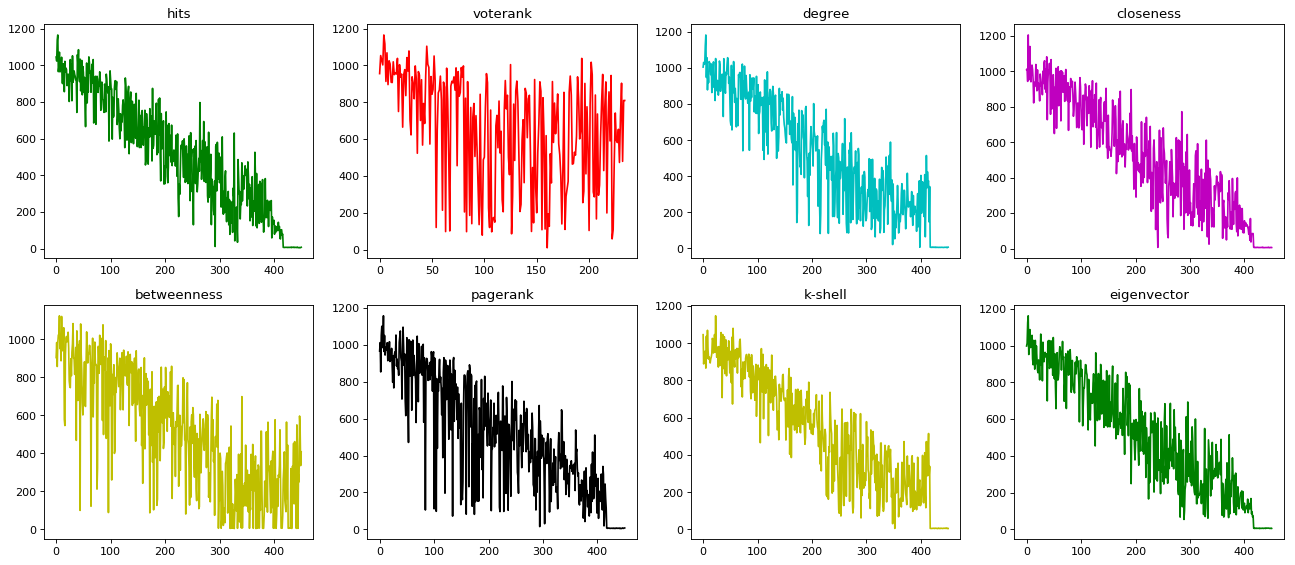

In [89]:
idx_counter = 1
colors = "bgrcmykygyb"
fig=plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')
plt.subplots_adjust(top=1.5)
for method, nd_lab_scores in scores.items():
    sp = plt.subplot(840 + idx_counter)
    sp.plot(nd_lab_scores[1], colors[idx_counter])
    sp.set_title(method)
    idx_counter += 1
plt.show()

### *London Transportation* Network central nodes

In [23]:
scores = {}
scores_15 = {}
mean_realisation = 10
for method, nodes in cent_dict_lt.items():
    node_labels = []
    nodes_scores = []
    for node in nodes:
        mean_spread = []
        for _ in range(mean_realisation):
            sis = SISMultiplex(im_lt.get_network_adjacency(), beta=0.3, mu=0.01, inter_beta=0.75, 
                           inter_rec=0.75, seed_nodes=[node])
            sis.run(epochs=10, visualize=False)
            mean_spread.append(sis.get_num('i'))
        node_labels.append(node)
        nodes_scores.append(np.mean(mean_spread))
    scores[method] = node_labels, nodes_scores
    scores_15[method] = nodes_scores[:15]
pd.DataFrame.from_dict(scores_15)

,betweenness,closeness,degree,eigenvector,hits,k-shell,pagerank,voterank
0,38.5,40.3,14.4,31.6,44.3,2.6,19.1,20.4
1,33.1,31.8,25.3,39.8,35.9,2.1,26.7,29.2
2,17.6,38.0,33.0,25.7,29.6,9.1,30.8,49.7
3,48.2,25.6,30.1,36.7,32.4,4.6,20.3,29.3
4,39.8,51.2,20.6,39.4,39.8,19.4,14.4,24.5
5,20.6,42.1,35.9,19.8,23.4,7.8,18.5,52.6
6,17.1,43.6,44.4,30.5,45.5,10.3,23.5,20.3
7,22.0,25.0,23.5,20.4,34.0,7.8,15.5,28.8
8,37.8,26.6,12.0,30.0,32.9,9.3,40.4,16.5
9,22.0,36.6,24.9,26.5,30.5,23.4,43.6,34.7


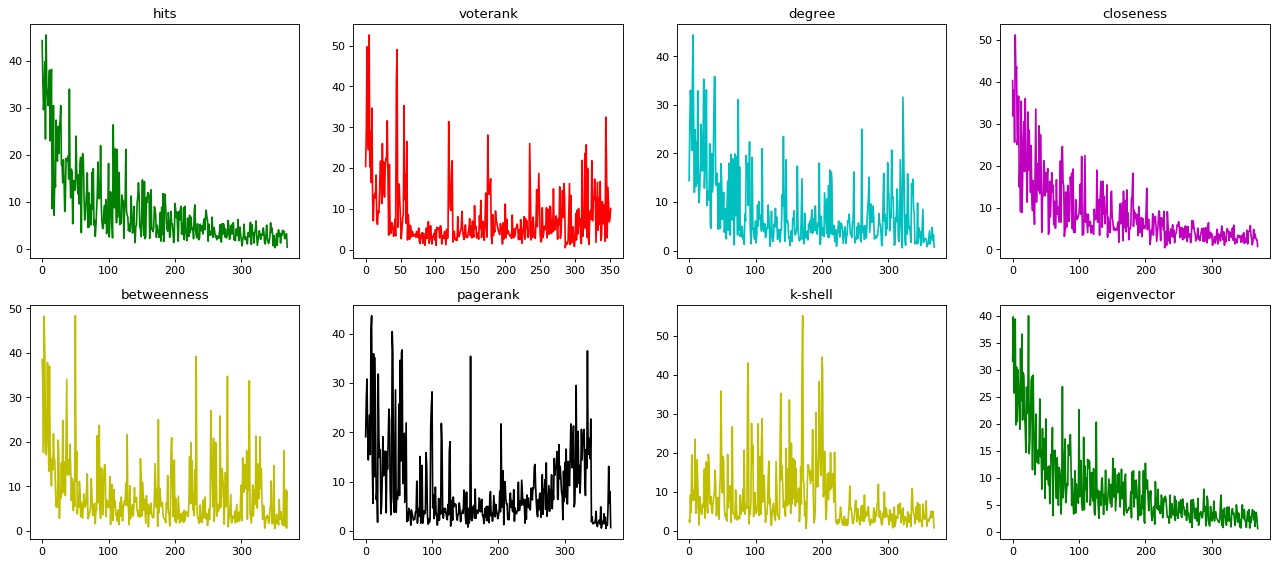

In [59]:
idx_counter = 1
colors = "bgrcmykygyb"
fig=plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')
plt.subplots_adjust(top=1.5)
for method, nd_lab_scores in scores.items():
    sp = plt.subplot(840 + idx_counter)
    sp.plot(nd_lab_scores[1], colors[idx_counter])
    sp.set_title(method)
    idx_counter += 1
plt.show()

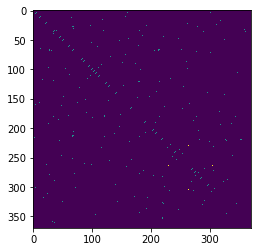

In [73]:
n_layers = im_lt.get_network_adjacency().shape[-1]
layer_scores_lt = []
for layer_idx in range(n_layers):
    proba_layer_lt = im_lt.link_conditional(im_lt.agg_net, im_lt.get_network_adjacency()[:, :, layer_idx])
    layer_scores_lt.append(proba_layer_lt)
fin_scores_lt = np.sort(layer_scores_lt)
fin_arg_scores = np.argsort(layer_scores_lt)
# Weight layers
mul_net = im_lt.get_network_adjacency()
for score_layer, layer_idx in zip(fin_scores_lt, fin_arg_scores):
    mul_net[layer_idx] *= score_layer
agg_mul = np.sum(mul_net, axis=2)
plt.imshow(agg_mul)
# cnt_agg = CentralityMeasure(agg_mul)
# cnt_agg.network_cn('betweenness')

### *FAO Trade Network* Network central nodes

In [36]:
scores = {}
mean_realisation = 10
for method, nodes in cent_dict_fao.items():
    nodes_scores = []
    for node in nodes:
        mean_spread = []
        for _ in range(mean_realisation):
            sis = SISMultiplex(im_fao.get_network_adjacency(), beta=0.3, mu=0.01, inter_beta=0.75, 
                           inter_rec=0.75, seed_nodes=[node])
            sis.run(epochs=10, visualize=False)
            mean_spread.append(sis.get_num('i'))
        nodes_scores.append(np.mean(mean_spread))
    scores[method] = nodes_scores
pd.DataFrame.from_dict(scores)

,betweenness,closeness,degree,eigenvector,hits,pagerank,voterank
0,7842.0,8067.6,8124.8,8198.3,8202.5,7858.9,8116.5
1,8115.3,8193.8,7866.4,8131.1,8089.9,8101.4,8132.9
2,8157.9,8068.0,8258.3,8099.1,8131.3,8156.1,8223.5
3,8258.3,8245.6,8091.7,7856.5,7860.4,8245.0,7951.8
4,8149.4,7869.0,8169.1,8191.9,8157.7,8209.5,8122.8
5,8238.1,8222.6,8193.6,8241.4,8234.7,8125.3,8218.4
6,7817.0,8070.4,8097.3,8046.9,8050.2,8251.7,8110.0
7,8070.2,8273.8,8199.0,8166.2,8210.2,8032.6,8284.3
8,6492.4,7599.7,7677.7,8230.7,8234.6,7682.8,7647.3
9,8083.2,8150.2,8180.7,8179.1,8156.7,8017.5,8229.3
